# Example 11.5: Multistage Compression with Intercooling

*John F. Maddox, Ph.D., P.E.<br>
University of Kentucky - Paducah Campus<br>
ME 321: Engineering Thermodynamics II<br>*

## Problem Statement
R-134a flows through a vapor-compression refrigeration cycle.  Heat is removed at a rate of 18 kW from a freezer at $-8^\circ\mathrm{C}$.  Heat is rejected to a room at $22^\circ\mathrm{C}$.  The evaporator and the condenser are $10^\circ\mathrm{C}$ colder or hotter than the thermal reservoirs.  A flash chamber is used to separate the vapor from the liquid at a pressure of $4\ \mathrm{bar}$.  The vapor portion is used to intercool multistage compression. Find:
* (a) $p_\mathrm{evap}$ and $p_\mathrm{cond}$ (kPa)
* (b) $COP_R$
* (c) Net Work

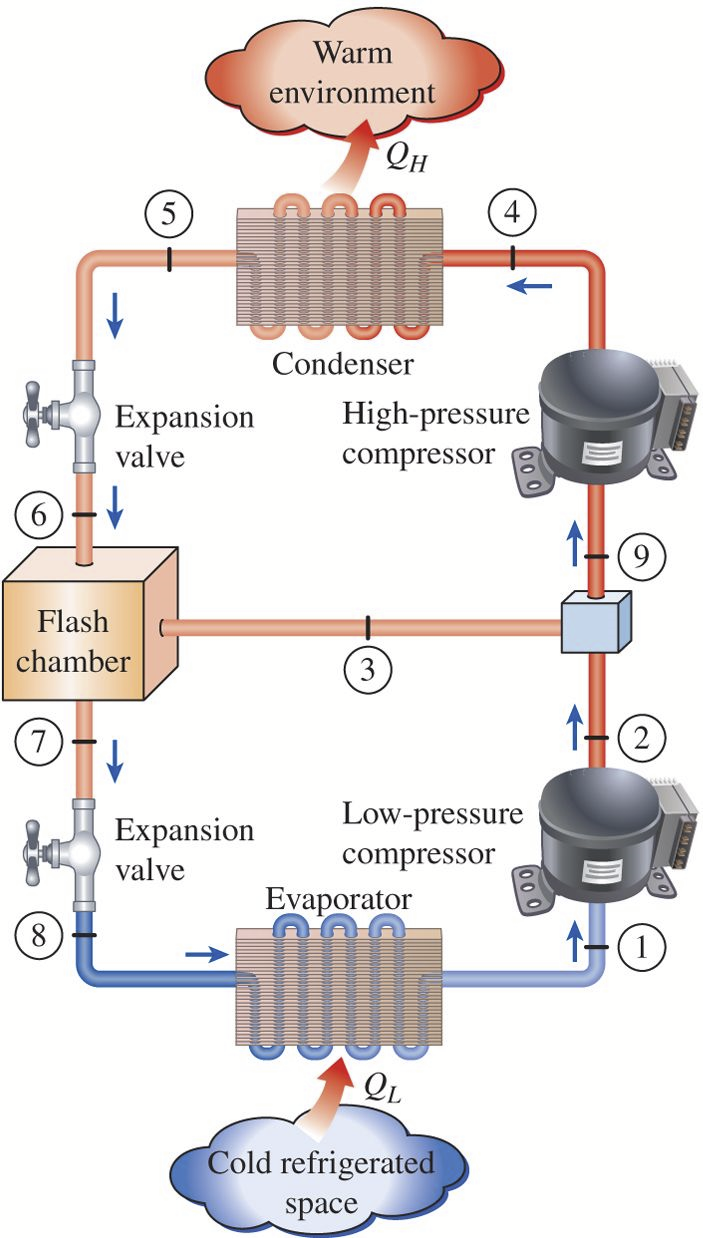

## Solution

__[Video Explanation](https://uky.yuja.com/V/Video?v=2005386&node=7667546&a=1041408079&autoplay=1)__

### Python Initialization
We'll start by importing the libraries we will use for our analysis and initializing dictionaries to hold the properties we will be usings.

In [1]:
from kilojoule.templates.default import *
   
r134a = realfluid.Properties('R134a')

### Given Parameters
We now define variables to hold our known values.

In [2]:
Qdot_in = Quantity(18,'kW')   # Rate of heat input
T_L = Quantity(-8,'degC')     # Temperature of refrigerated space
T_H = Quantity(22,'degC')     # Temperature of surroundings
Delta_T = Quantity(10,'delta_degC') # Temperature difference in evaporator and condenser
p_flash = Quantity(4,'bar')   # Flash chamber pressure

Summary();

<IPython.core.display.Latex object>

### Assumptions
- Ideal work devices
- Saturated vapor at evaporator exit
- Saturated liquid at condenser exit
- Flash chamber exits are saturated vapor and liquid
- Isobaric heat exchangers
- Negligible changes in kinetic energy
- Negligible changes in potential energy

In [3]:
x[1] = 1      # Saturated vapor at evaporator exit
x[5] = 0      # Saturated liquid at condenser exit
x[7] = 0      # Saturated liquid at flash chamber exit
x[3] = 1      # Saturated vapor at flash chamber exit
p[6] = p[7] = p[3] = p[2] = p[9] = p_flash # isobaric heat exchangers

Summary();

<IPython.core.display.Latex object>

,p,x
unit,kPa,
1,-,1.0
2,400.0,-
3,400.0,1.0
5,-,0.0
6,400.0,-
7,400.0,0.0
9,400.0,-


### (a) Pressures in condenser and evaporator

In [4]:
%%showcalc
#### Evaporator pressure
# The working fluid temperature must be lower than the refrigerated space
T[1] = T_L - Delta_T
# The fluid is saturated, so the saturation pressure must be consistent with the saturation temperature
p[1] = r134a.p(T[1],x[1])

#### Condenser pressure
# The working fluid temperature must be hotter than the surroundings
T[5] = T_H + Delta_T
# The fluid is saturated, so the saturation pressure must be consistent with the saturation temperature
p[5] = r134a.p(T[5],x[5])

### Evaporator pressure

 The working fluid temperature must be lower than the refrigerated space

<IPython.core.display.Latex object>

 The fluid is saturated, so the saturation pressure must be consistent with the saturation temperature

<IPython.core.display.Latex object>

### Condenser pressure

 The working fluid temperature must be hotter than the surroundings

<IPython.core.display.Latex object>

 The fluid is saturated, so the saturation pressure must be consistent with the saturation temperature

<IPython.core.display.Latex object>

### (b) $COP_R$

In [5]:
%%showcalc
#### 1st Law Analysis
##### State 5
h[5] = r134a.h(p[5],x[5])

##### State 6
h[6] = h[5]
x[6] = r134a.x(p[6],h=h[6])

##### State 7
h[7] = r134a.h(p[7],x=0)

#### State 8
h[8] = h[7]
p[8] = p[1]

##### State 1
h[1] = r134a.h(T[1],x[1])
s[1] = r134a.s(T[1],x[1])

##### 8-1) Isobaric heat addition
q_in = h[1]-h[8]
##### Mass flow rate
mdot[1] = mdot[2] = mdot[8] = mdot[7] = Qdot_in/q_in

##### 1-2) Ideal compression
p[2] = p[3]
s[2] = s[1]

##### State 2
T[2] = r134a.T(p[2],s[2])
h[2] = r134a.h(p[2],s[2])

##### 2,3-9) 
##### State 3
h[3] = r134a.h(p[3],x[3])
##### Mass flow rate
mdot[3] = x[6]*mdot[1]
##### State 9
mdot[9] = mdot[4] = mdot[5] = mdot[6] = mdot[1] + mdot[3]
h[9] = (mdot[2]*h[2] + mdot[3]*h[3])/mdot[9]

##### 9-4) Ideal compression
s[9] = r134a.s(p[9],h=h[9])
p[4] = p[5]
s[4] = s[9]
h[4] = r134a.h(p[4],s[4])

##### COP
# Desired: Heat Input
# Cost: Net Work
Wdot_net = mdot[1]*(h[2]-h[1]) + mdot[9]*(h[4]-h[9])
# COP: Desired/Cost
COP_R = Qdot_in/Wdot_net

### 1st Law Analysis

#### State 5

<IPython.core.display.Latex object>

#### State 6

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

#### State 7

<IPython.core.display.Latex object>

### State 8

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

#### State 1

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

#### 8-1) Isobaric heat addition

<IPython.core.display.Latex object>

#### Mass flow rate

<IPython.core.display.Latex object>

#### 1-2) Ideal compression

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

#### State 2

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

#### 2,3-9) 

#### State 3

<IPython.core.display.Latex object>

#### Mass flow rate

<IPython.core.display.Latex object>

#### State 9

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

#### 9-4) Ideal compression

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

#### COP

 Desired: Heat Input

 Cost: Net Work

<IPython.core.display.Latex object>

 COP: Desired/Cost

<IPython.core.display.Latex object>

### (c) Net Work

In [6]:
%%showcalc
# Solved in Part (b)
Wdot_net = Wdot_net

 Solved in Part (b)

<IPython.core.display.Latex object>

### Diagrams

In [7]:
# Remaining properties
for i in range(1,10):
    states.fix(i, r134a)

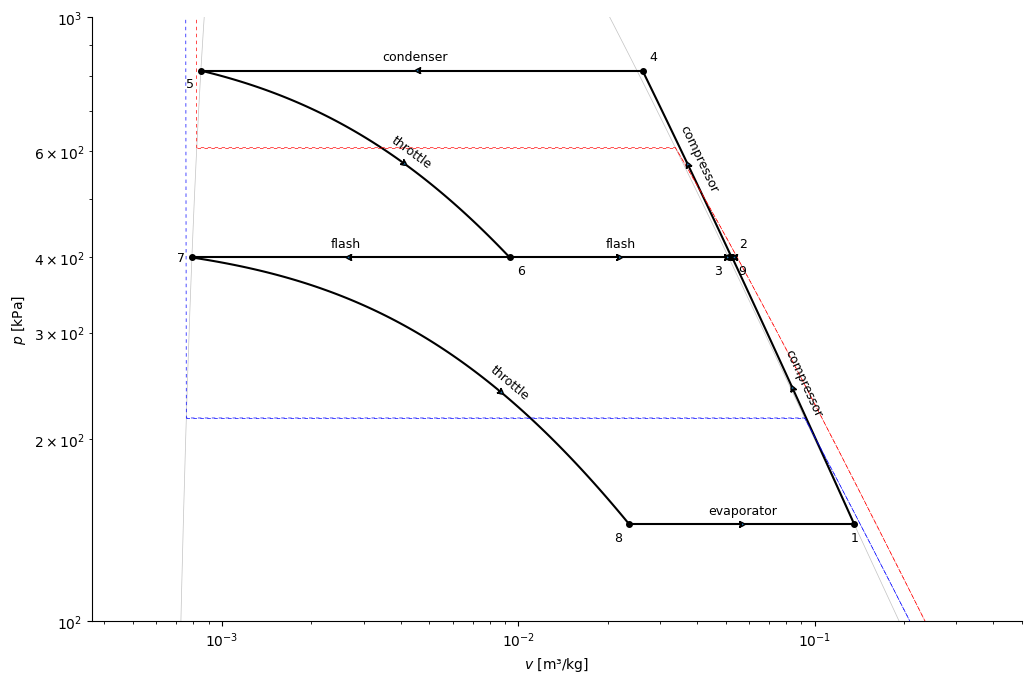

In [8]:
pv = r134a.pv_diagram()
pv.ax.set_ylim(bottom=100, top=1000)
pv.ax.set_xlim(right=.5)

pv.plot_state(states[1],label_loc='south')
pv.plot_state(states[2],label_loc='north east')
pv.plot_state(states[3],label_loc='south west')
pv.plot_state(states[4],label_loc='north east')
pv.plot_state(states[5],label_loc='south west')
pv.plot_state(states[6],label_loc='south east')
pv.plot_state(states[7],label_loc='west')
pv.plot_state(states[8],label_loc='south west')
pv.plot_state(states[9],label_loc='south east')

pv.plot_process(states[1],states[2],path='isentropic',label='compressor')
pv.plot_process(states[2],states[9],path='isobaric')
pv.plot_process(states[3],states[9],path='isobaric')
pv.plot_process(states[9],states[4],path='isentropic',label='compressor');
pv.plot_process(states[4],states[5],path='isobaric',label='condenser')
pv.plot_process(states[5],states[6],path='isenthalpic',label='throttle')
pv.plot_process(states[6],states[7],path='isobaric',label='flash')
pv.plot_process(states[6],states[3],path='isobaric',label='flash');
pv.plot_process(states[7],states[8],path='isenthalpic',label='throttle')
pv.plot_process(states[8],states[1],path='isobaric',label='evaporator');

# Plot Reference Isotherms for refrigerated space and surroundings
# Refrigerated space
pv.plot_isotherm(T_L,color='blue',label=False)
# Surrounding temperature
pv.plot_isotherm(T_H,color='red',label=False);

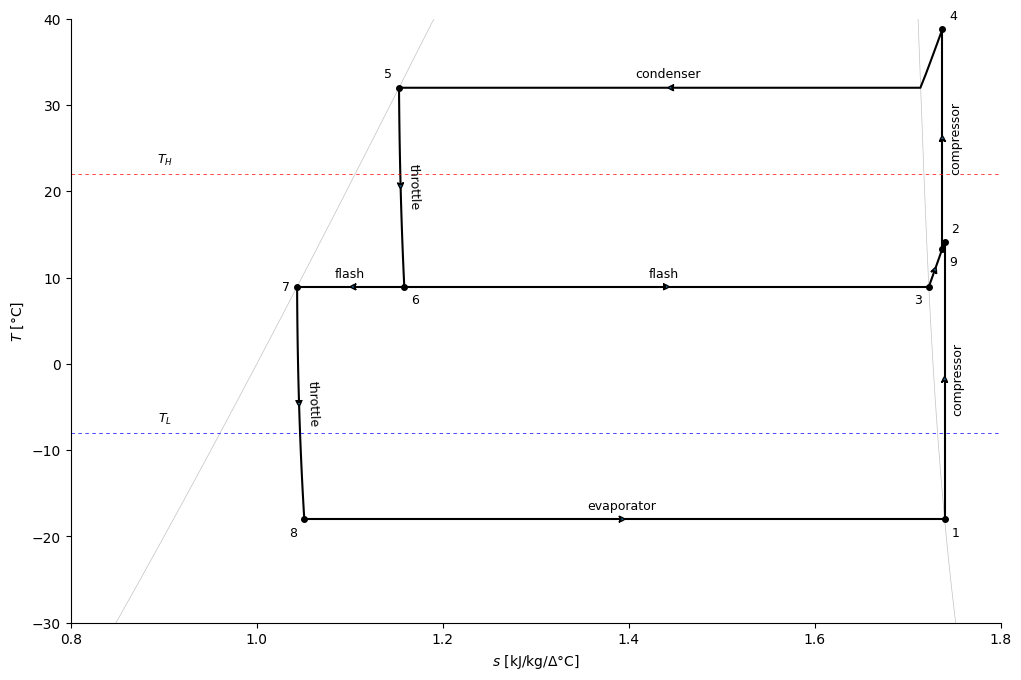

In [9]:
Ts = r134a.Ts_diagram()
Ts.ax.set_ylim(bottom=-30, top=40)
Ts.ax.set_xlim(left=.8, right=1.8)

Ts.plot_state(states[1],label_loc='south east')
Ts.plot_state(states[2],label_loc='north east')
Ts.plot_state(states[3],label_loc='south west')
Ts.plot_state(states[4],label_loc='north east')
Ts.plot_state(states[5],label_loc='north west')
Ts.plot_state(states[6],label_loc='south east')
Ts.plot_state(states[7],label_loc='west')
Ts.plot_state(states[8],label_loc='south west')
Ts.plot_state(states[9],label_loc='south east')

Ts.plot_process(states[1],states[2],path='isentropic',label='compressor',labelprops=dict(va='top'))
Ts.plot_process(states[2],states[9],path='isobaric',arrow=False)
Ts.plot_process(states[3],states[9],path='isobaric')
Ts.plot_process(states[9],states[4],path='isentropic',label='compressor',labelprops=dict(va='top'))
Ts.plot_process(states[4],states[5],path='isobaric',label='condenser')
Ts.plot_process(states[5],states[6],path='isenthalpic',label='throttle')
Ts.plot_process(states[6],states[7],path='isobaric',label='flash')
Ts.plot_process(states[6],states[3],path='isobaric',label='flash');
Ts.plot_process(states[7],states[8],path='isenthalpic',label='throttle')
Ts.plot_process(states[8],states[1],path='isobaric',label='evaporator');

# Plot Reference Isotherms for refrigerated space and surroundings
Ts.plot_isotherm(T_L,color='blue', label='$T_L$',pos=.1)
Ts.plot_isotherm(T_H,color='red', label='$T_H$',pos=.1);

In [10]:
states.display()

,T,p,v,u,h,s,x,phase,mdot
unit,K,kPa,m³/kg,kJ/kg,kJ/kg,kJ/K/kg,,,kg/s
1,255.150000,144.600367,0.135923,368.133408,387.787860,1.739570,1,twophase,0.102461
2,287.254690,400.000000,0.052636,387.497380,408.551899,1.739570,N/A,gas,0.102461
3,282.080604,400.000000,0.051207,383.236695,403.719411,1.722593,1,twophase,0.017385
4,311.925815,815.426515,0.026224,401.590591,422.974478,1.737126,N/A,gas,0.119846
5,305.150000,815.426515,0.000848,243.931328,244.622621,1.152910,0,twophase,0.119846
6,282.080604,400.000000,0.009345,240.884551,244.622621,1.158582,0.169677,twophase,0.119846
7,282.080604,400.000000,0.000791,211.794817,212.111109,1.043325,0,twophase,0.102461
8,255.150000,144.600367,0.023667,208.688810,212.111109,1.051047,0.169605,twophase,0.102461
9,286.500616,400.000000,0.052431,386.878535,407.850884,1.737126,N/A,gas,0.119846
